# Gaussian Process

Gaussian Processes (GP) are a generic supervised learning method designed to solve regression and probabilistic classification problems. 

https://scikit-learn.org/stable/modules/gaussian_process.html#gaussian-process

In [1]:
%load_ext autoreload
%autoreload
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from scipy import stats

from MLP.mlp_regression import mlp_regression, model_validation, mlp_prediction, mlp_prediction_error, mlp_train_graph, errorDist, mlp_train_multi_graph, mlp_train_multi_graph_comb, mlp_train_multi_3dgraph_comb
from MLP.utils import data_loader_pathloss, describeData, data_loader_pathloss_with_freq

pd.set_option('display.max_rows', 999)
pd.set_option('precision', 5)

In [2]:
%autoreload
X_train_bh_34, y_train_bh_34, X_val_bh_34, y_val_bh_34, X_test_bh_34, y_test_bh_34 = data_loader_pathloss('data/PLdata_bh_34.mat')
X_train_bh_53, y_train_bh_53, X_val_bh_53, y_val_bh_53, X_test_bh_53, y_test_bh_53 = data_loader_pathloss('data/PLdata_bh_53.mat')
X_train_bh_64, y_train_bh_64, X_val_bh_64, y_val_bh_64, X_test_bh_64, y_test_bh_64 = data_loader_pathloss('data/PLdata_bh_64.mat')

X_train_bh = np.concatenate((X_train_bh_34, X_train_bh_53), axis=0)
y_train_bh = np.concatenate((y_train_bh_34, y_train_bh_53),axis=0)
X_train_bh = np.concatenate((X_train_bh, X_train_bh_64), axis=0)
y_train_bh = np.concatenate((y_train_bh, y_train_bh_64),axis=0)

X_val_bh = np.concatenate((X_val_bh_34, X_val_bh_53), axis=0)
y_val_bh = np.concatenate((y_val_bh_34, y_val_bh_53),axis=0)
X_val_bh = np.concatenate((X_val_bh, X_val_bh_64), axis=0)
y_val_bh = np.concatenate((y_val_bh, y_val_bh_64),axis=0)

X_test_bh = np.concatenate((X_test_bh_34, X_test_bh_53), axis=0)
y_test_bh = np.concatenate((y_test_bh_34, y_test_bh_53),axis=0)
X_test_bh = np.concatenate((X_test_bh, X_test_bh_64), axis=0)
y_test_bh = np.concatenate((y_test_bh, y_test_bh_64),axis=0)

X_train_ma_34, y_train_ma_34, X_val_ma_34, y_val_ma_34, X_test_ma_34, y_test_ma_34 = data_loader_pathloss('data/PLdata_ma_34.mat')
X_train_ma_53, y_train_ma_53, X_val_ma_53, y_val_ma_53, X_test_ma_53, y_test_ma_53 = data_loader_pathloss('data/PLdata_ma_53.mat')
X_train_ma_64, y_train_ma_64, X_val_ma_64, y_val_ma_64, X_test_ma_64, y_test_ma_64 = data_loader_pathloss('data/PLdata_ma_64.mat')

X_train_ma = np.concatenate((X_train_ma_34, X_train_ma_53), axis=0)
y_train_ma = np.concatenate((y_train_ma_34, y_train_ma_53),axis=0)
X_train_ma = np.concatenate((X_train_ma, X_train_ma_64), axis=0)
y_train_ma = np.concatenate((y_train_ma, y_train_ma_64),axis=0)

X_val_ma = np.concatenate((X_val_ma_34, X_val_ma_53), axis=0)
y_val_ma = np.concatenate((y_val_ma_34, y_val_ma_53),axis=0)
X_val_ma = np.concatenate((X_val_ma, X_val_ma_64), axis=0)
y_val_ma = np.concatenate((y_val_ma, y_val_ma_64),axis=0)

X_test_ma = np.concatenate((X_test_ma_34, X_test_ma_53), axis=0)
y_test_ma = np.concatenate((y_test_ma_34, y_test_ma_53),axis=0)
X_test_ma = np.concatenate((X_test_ma, X_test_ma_64), axis=0)
y_test_ma = np.concatenate((y_test_ma, y_test_ma_64),axis=0)

<Bundang>


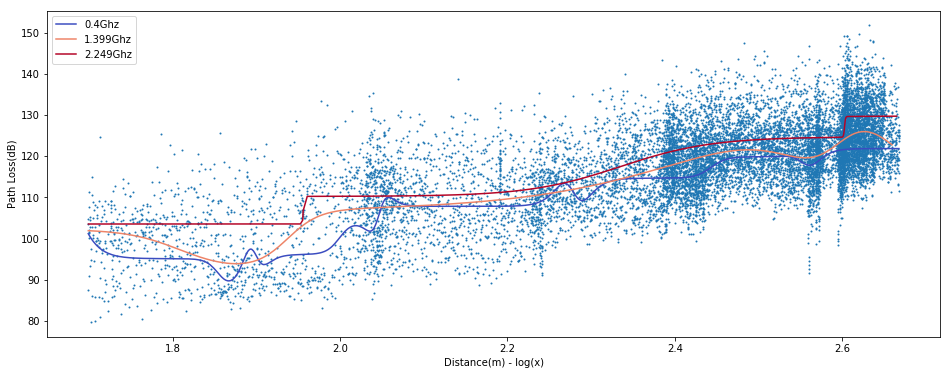

RMSE(dB),train error,test error
3.4Ghz,6.83040,6.99027
5.3Ghz,6.85783,6.93591
6.4Ghz,7.41804,6.99479


In [3]:
%autoreload
dataX = list()
dataY = list()
dataPredX = list()
model_34 = mlp_regression(X_train_bh_34, y_train_bh_34, (60), 'logistic', 'lbfgs')
dataX.append(X_train_bh_34)
dataY.append(y_train_bh_34)
dataPredX.append(model_34.predict(X_train_bh_34))
model_53 = mlp_regression(X_train_bh_53, y_train_bh_53, (60), 'logistic', 'lbfgs')
dataX.append(X_train_bh_53)
dataY.append(y_train_bh_53)
dataPredX.append(model_53.predict(X_train_bh_53))
model_64 = mlp_regression(X_train_bh_64, y_train_bh_64, (60), 'logistic', 'lbfgs')
dataX.append(X_train_bh_64)
dataY.append(y_train_bh_64)
dataPredX.append(model_64.predict(X_train_bh_64))

print("<Bundang>")
mlp_train_multi_graph(dataX, dataY, dataPredX, X_train_bh, y_train_bh, 'distance')

stat = np.array([mlp_prediction_error(model_34,X_train_bh_34, y_train_bh_34), mlp_prediction_error(model_34,X_test_bh_34, y_test_bh_34),
                 mlp_prediction_error(model_53,X_train_bh_53, y_train_bh_53),mlp_prediction_error(model_53,X_test_bh_53, y_test_bh_53),
                 mlp_prediction_error(model_64,X_train_bh_64, y_train_bh_64),mlp_prediction_error(model_64,X_test_bh_64, y_test_bh_64)])

(pd.DataFrame(stat.reshape((3,2)),index=pd.Index(['3.4Ghz','5.3Ghz','6.4Ghz']), columns=pd.Index(['train error','test error'],name='RMSE(dB)')))

In [4]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

In [6]:
X = dataX[0]
y = dataY[0]

# Instantiate a Gaussian Process model
# kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
# kernel = 1.0 * RBF(length_scale=100.0, length_scale_bounds=(1e-2, 1e3)) \
#    + WhiteKernel(noise_level=1, noise_level_bounds=(1e-10, 1e+1))
# gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
kernel = 1.0 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e3)) \
    + WhiteKernel(noise_level=1e-5, noise_level_bounds=(1e-10, 1e+1))
gp = GaussianProcessRegressor(kernel=kernel,
                              alpha=0.0)
# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X, y)

GaussianProcessRegressor(alpha=0.0, copy_X_train=True,
             kernel=1**2 * RBF(length_scale=1) + WhiteKernel(noise_level=1e-05),
             n_restarts_optimizer=0, normalize_y=False,
             optimizer='fmin_l_bfgs_b', random_state=None)

<Bundang, 3.4Ghz> Pathloss Estimation using Gaussian Process


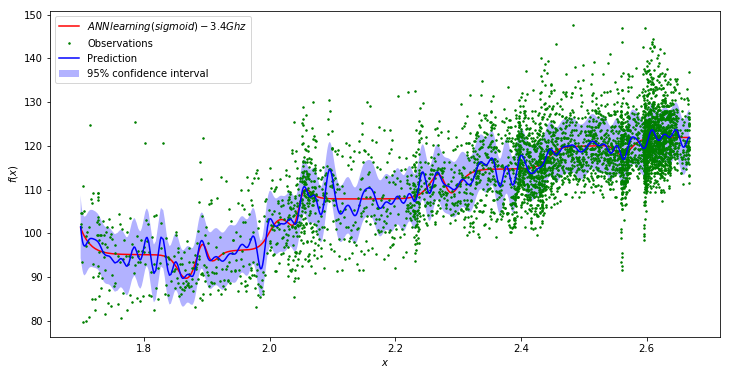

In [7]:
# Make the prediction on the meshed x-axis (ask for MSE as well)
print("<Bundang, 3.4Ghz> Pathloss Estimation using Gaussian Process")
y_pred, sigma = gp.predict(X, return_std=True)

# Plot the function, the prediction and the 95% confidence interval based on
# the MSE
plt.figure(figsize=(12,6))
plt.plot(X, dataPredX[0], 'r-', label=r'$ANN learning(sigmoid) - 3.4Ghz$')
plt.plot(X, y, 'g.', markersize=3, label=u'Observations')
plt.plot(X, y_pred, 'b-', label=u'Prediction')
plt.fill(np.concatenate([X, X[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,
                        (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.3, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
# plt.ylim(-10, 20)
plt.legend(loc='upper left')

plt.show()

In [8]:
rmse = np.sqrt(np.mean(np.power(y-y_pred,2)))
print("Gaussian Process RMSE: " + str(rmse))

Gaussian Process RMSE: 6.674692086241815
